# Develop dataloader

In [1]:
import sys
sys.path.append('..')

In [36]:
import os
import numpy as np
import json
import torch
import matplotlib.pyplot as plt

In [3]:
scenario = 'motorway'
experiment_name = 'incident3'
path = f'../{scenario}/Results/{experiment_name}'

In [4]:
os.listdir(path)

['ind_to_edge.json',
 'inci_data.npy',
 'simulations',
 'incident_settings.npy',
 'target_data.npy',
 'input_data.npy',
 'counter_data.npy']

In [5]:
#inci_data = np.load(f'{path}/inci_data.npy')
input_data = np.load(f'{path}/input_data.npy')
target_data = np.load(f'{path}/target_data.npy')
#counter_data = np.load(f'{path}/counter_data.npy')

In [6]:
len(input_data)

1422

In [7]:
train_len = int(np.ceil(len(input_data) * 0.6))
test_val_len = int(np.round((len(input_data) - train_len) * 0.5))
print(train_len +  2 * test_val_len)

1422


In [8]:
with open(f'{path}/ind_to_edge.json') as f:
    ind_to_edge = json.load(f)

In [9]:
incident_settings = np.load(f'{path}/incident_settings.npy', allow_pickle=True)

In [10]:
incident_settings[[10,11,234]]

array([{'slow_zone': 70, 'lc_zone': 20, 'lc_prob_zone': 170, 'slow_zone_speed': 13.8, 'run_num': 1577, 'is_incident': True, 'is_random': True, 'random_seed': 137566741, 'edge': '4414080#1-AddedOnRampEdge', 'lanes': [0, 1, 2, 3], 'pos': 36.11108444908973, 'start_time': 73121, 'start_step': 146242, 'duration_time': 1353, 'duration_steps': 2706},
       {'slow_zone': 70, 'lc_zone': 20, 'lc_prob_zone': 170, 'slow_zone_speed': 13.8, 'run_num': 1799, 'is_incident': True, 'is_random': True, 'random_seed': 157823407, 'edge': '360361373-AddedOnRampEdge', 'lanes': [0, 1, 2, 3, 4], 'pos': 25.9627094066895, 'start_time': 55705, 'start_step': 111410, 'duration_time': 1200, 'duration_steps': 2400},
       {'slow_zone': 70, 'lc_zone': 20, 'lc_prob_zone': 170, 'slow_zone_speed': 13.8, 'run_num': 1161, 'is_incident': True, 'is_random': True, 'random_seed': 1405163169, 'edge': '4402237', 'lanes': [2], 'pos': 49.28923841080593, 'start_time': 2461, 'start_step': 4922, 'duration_time': 1126, 'duration_step

In [11]:
from utils.data_utils.data_loader_utils import IncidentDataModule

In [12]:
datamodule = IncidentDataModule()

In [13]:
datamodule.setup(path, 0.6)

In [14]:
train_dataloader = datamodule.train_dataloader()

In [20]:
_, batch = next(enumerate(train_dataloader))

In [16]:
train_dataloader.dataset.input_data.shape

(854, 147, 6, 10, 5)

In [17]:
train_dataloader.dataset.target_data.shape

(854, 147, 4)

In [18]:
train_dataloader.dataset.incident_settings.shape

(854,)

In [24]:
for batch in train_dataloader:
    #print(batch)

SyntaxError: unexpected EOF while parsing (454346325.py, line 2)

In [60]:
test2 = batch['input'].permute(0,1,2,4,3)
test2.shape

torch.Size([32, 147, 6, 5, 10])

In [75]:
test = test2.reshape(32 * 147, 5 * 6, 10).permute(0,2,1)

test.shape

torch.Size([4704, 10, 30])

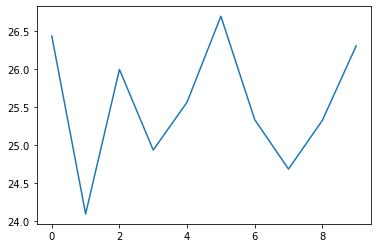

In [73]:
plt.plot(test2[1,0,1,1,:])

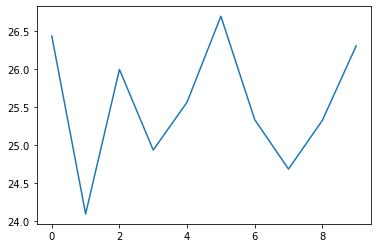

In [74]:
plt.plot(test[147,6,:])